# Binary Trees and Recursion

In this exercise we will look at binary trees (trees where each node has at most two children). 

Binary trees are are used to represent phylogenies and ancestral relationshiops in population genetics. 

Binary trees are also fundamental data structures in computer science that are used to represent hierarchical relationships between objects. In Python, binary trees can be implemented using classes and objects, providing a flexible and efficient way to store, manipulate, and search for data in a tree-like structure. This article will explore how binary trees are implemented in Python and discuss common operations such as insertion, deletion, and traversal.

## Install graphviz

If you did not do so already, you should install the packages shown below. We will use the graphviz library to generate figures of trees.

```
conda activate ctib
conda install -c conda-forge graphviz python-graphviz pydot
```

## Import libraries for use in this notebook

In [101]:
from IPython.display import display, SVG
import graphviz
import random
import time
from statistics import mean
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## Class Definition for Binary Tree Node:

In Python, binary trees can be implemented using classes, with each node in the tree represented as an object of the class. Here is an example implementation of a binary tree node:

In [102]:
class TreeNode:
    
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

This `TreeNode` class is really just a container for three attributes:

- `key`: Represents the value or key stored in the node. You kan think about it as the node id. I can also be used to hold some data associated with the node.
- `left`: Represents the left child node of the current node. This child is also a `TreeNode`
- `right`: Represents the right child node of the current node. This child is also a `TreeNode`

All nodes in the tree, including the root and the leaves, are `TreeNodes`s, The leaves just do not have any children. I.e., both their `left` and `right` attribues are `None`.

## Visualizing the tree

A tree is really just a bipartite graph, so we can use a graph library like `graphviz` to plot the nodes and edges of the tree. When you are working with trees below, you can use this function to visualize your trees. It is a bit advanced, but it really just makes a graph object, `dot`, and then recursively adds nodes and edges using the `add_nodes_edges` function defined inside `show_tree`. Because `add_nodes_edges` is defined inside `show_tree`, it can access to the the `dot` variable and add nodes and edges to it.

In [103]:
def show_tree(root):
    dot = graphviz.Digraph()
    dot.node(str(root.key))

    def add_nodes_edges(node):
        if node.left:
            dot.node(str(node.left.key))
            dot.edge(str(node.key), str(node.left.key))
            add_nodes_edges(node.left)
        if node.right:
            dot.node(str(node.right.key))
            dot.edge(str(node.key), str(node.right.key))
            add_nodes_edges(node.right)

    add_nodes_edges(root)
    return dot

## Making a tree manually

Lets try to make some trees the hard way:

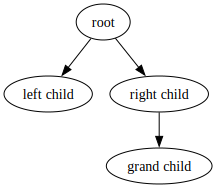

In [104]:
root = TreeNode('root')
l = TreeNode('left child')
root.left = TreeNode('left child')
r = TreeNode('right child')
root.right = r
r.left = TreeNode('grand child')
show_tree(root)

or with numbers:

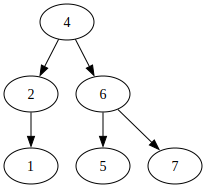

In [105]:
root = TreeNode(4)
l = TreeNode(2)
root.left = l
l.left = TreeNode(1)
r = TreeNode(6)
root.right = r
r.left = TreeNode(5)
r.right = TreeNode(7)
show_tree(root)

## Exercise: Make node tree from nested tuples

You have already seen at the lectures that a tree can also be represented as a list of nested tuples like this: `((1, 2), (3, 4))`. This tree has four leaves clustering `1` with `2` and `3` with `4`. You can think of the root node as `((1, 2), (3, 4))`, its left and right children as `(1, 2)` and `(3, 4)` and the four leaves as `1`, `2`, `3`, and `4`.

Now see if you can write a recursive function that can generate a tree of `TreeNodes` from any list of nested tuples. Once it works you should be able to produce this picture:

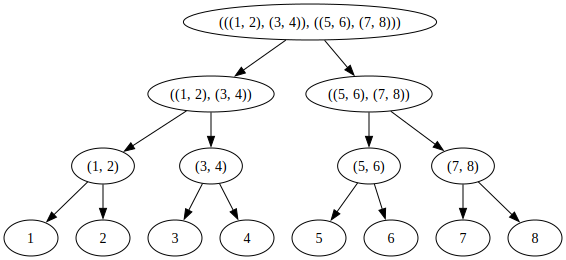

In [106]:
display(SVG(filename='tuple_tree.svg'))

Fill in the recursive case in the code below:

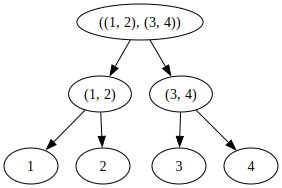

In [107]:
tuple_tree = ((1,2),(3,4),)
# tuple_tree = (((1,2),(3,4)),((5,6),(7,8)))

def from_tuples(t):

    if type(t) is not tuple:
        # if t is not a tuple, so it is a leaf:
        return TreeNode(t)
    else:
        # t a tuple and thus not a leaf
        l = from_tuples(t[0])
        r = from_tuples(t[1])
        tree = TreeNode((t[0], t[1]))
        tree.left = l
        tree.right = r
    
    return tree

root = from_tuples(tuple_tree)
show_tree(root)

The code below will allow you to save the picture to a file like the one included in the repository.:

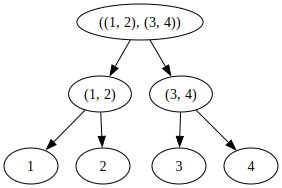

In [108]:
dot = show_tree(root)
open('tuple_tree.svg', 'wb').write(dot.pipe(format='svg'))
display(SVG(filename='tuple_tree.svg'))

## Using a tree to store ordered values

One of the first trees we made looked like the one below where each node represents an integer number. Notice how any left child of a node is always smaller than its parent and that a right child is always larger. 

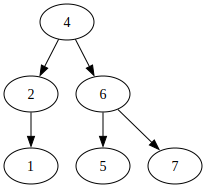

In [109]:
root = TreeNode(4)
l = TreeNode(2)
root.left = l
l.left = TreeNode(1)
r = TreeNode(6)
root.right = r
r.left = TreeNode(5)
r.right = TreeNode(7)
show_tree(root)

## Exercise: insert a node

If you were to insert a leaf node with value `3`, where would you put it?

When a tree obeys this rule, it serves as a data structure that makes it easier (often a lot) to find out if it holds a particular number. A search for a number, `x`, starts at the root. If `x` is the root key, the search ends successfully, returning `True`. If `x` is smaller, the search proceeds a the left child. Otherwise, it proceeds to the right child. If there are no children, the search ends unsuccesfully, returning `False`. In the example below, if `x = 5` then we would find it by visiting nodes `4`, `6`, and `5`. If `x = 3`, we know it was not there after visiting nodes `4` and `2` and seeing that it was not a child of `2`.

## Exercise: a recursive insert function

We can write a recursive function that inserts a new node in the right place in a tree. In the function below, `root` represents the root of the binary tree, and key represents the value of the new node to be inserted. The insertion operation is recursive, and it starts from the root and proceeds down the tree based on comparing the key with the current node's key. If the key is less than the current node's key, it goes to the left subtree; otherwise, it goes to the right subtree.

In [110]:
def insert(root, key):
    if root is None:
        return TreeNode(key)
    else:
        if key < root.key:
            root.left = insert(root.left, key)
        else:
            root.right = insert(root.right, key)
    return root

Make sure you understand how it works. How would the call stack fill and empty if we called made it insert `3` in the tree above?

## Exercise: Do some inserts

Do some inserts and show the tree at each step to get the hang of how it works:

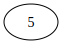

In [111]:
root = None
root = insert(root, 5)
show_tree(root)

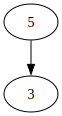

In [112]:
root = insert(root, 3)
show_tree(root)

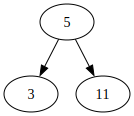

In [113]:
root = insert(root, 11)
show_tree(root)

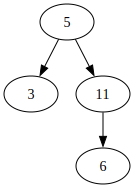

In [114]:
root = insert(root, 6)
show_tree(root)

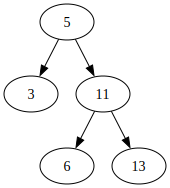

In [115]:
root = insert(root, 13)
show_tree(root)

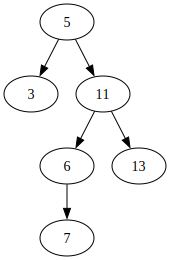

In [116]:
root = insert(root, 7)
show_tree(root)

## Exercise: Tree balance

Here is a function that automates the creation of a tree from a list of node values:

In [117]:
def build_tree(keys):
    root = None
    for key in keys:
        root = insert(root, key)
    return root

Use it to create trees from these lists: `[5, 3, 8, 2, 4, 7, 9]` and `[1, 2, 3, 4, 5, 6, 7]`. Notice how the tree shape is affected by the order in which numbers are added. Can you see why that is the case?

How long (deep) will a tree be if it is completely unbalanced (one long string of subsequent nodes)?

How long (deep) will a tree be if it is completely balanced, with the same number of left and right descendants at each node? How is that a function of the number of nodes in the tree?

## A nice binary tree

In the sections below, we need to easily build a balanced example tree to work on. Here is a function that makes one:

In [118]:
def example_tree():
    return build_tree([5, 3, 8, 2, 4, 7, 9])

You can make one and show it like this:

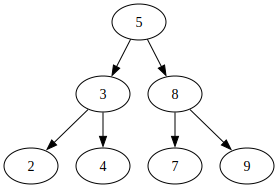

In [119]:
root = example_tree()
show_tree(root)

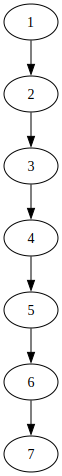

In [120]:
root = build_tree([1, 2, 3, 4, 5, 6, 7])
show_tree(root)

## Exercise: Traversal Operations

Traversal is the process of visiting each node in the binary tree in a specific order. Three common methods for traversing a binary tree are in-order, pre-order, and post-order. An example implementation of these traversal operations for a binary tree:

Note how the three functions are identical except for the placemnt for the placement of the `print(root.key)` line, which represent our "visit" to the node.

In [121]:
def inorder(root):
    if root is not None:
        inorder(root.left)
        print(root.key)
        inorder(root.right)

def preorder(root):
    if root is not None:
        print(root.key)
        preorder(root.left)
        preorder(root.right)

def postorder(root):
    if root is not None:
        postorder(root.left)
        postorder(root.right)
        print(root.key)

What does the order in which nodes are visited tell you about each kind of traversal?

In [122]:
root = example_tree()
inorder(root)

2
3
4
5
7
8
9


In [123]:
preorder(root)

5
3
2
4
8
7
9


In [124]:
postorder(root)

2
4
3
7
9
8
5


## Visualize traversals

The functions below produce graphs showing the order in which nodes are visited in each traversal:

In [125]:
def visual_inorder(root, dot):
    if root:
        visual_inorder(root.left, dot)
        dot.node(str(root.key), label=str(root.key))
        if root.left:
            dot.edge(str(root.left.key), str(root.key), style='dotted')
        if root.right:
            dot.edge(str(root.key), str(root.right.key), style='dotted')
        visual_inorder(root.right, dot)
    return dot

def visual_preorder(root, dot):
    if root:
        dot.node(str(root.key), label=str(root.key))
        if root.left:
            dot.edge(str(root.key), str(root.left.key), style='dotted')
        if root.right:
            dot.edge(str(root.key), str(root.right.key), style='dotted')
        visual_preorder(root.left, dot)
        visual_preorder(root.right, dot)
    return dot

def visual_postorder(root, dot):
    if root:
        visual_postorder(root.left, dot)
        visual_postorder(root.right, dot)
        dot.node(str(root.key), label=str(root.key))
        if root.left:
            dot.edge(str(root.left.key), str(root.key), style='dotted')
        if root.right:
            dot.edge(str(root.right.key), str(root.key), style='dotted')
    return dot

## Inorder traversal

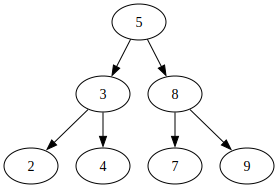

In [126]:
root = example_tree()
show_tree(root)

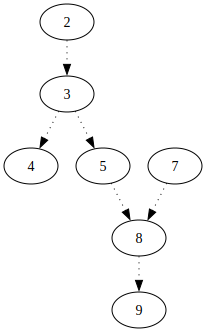

In [127]:
dot = graphviz.Digraph()
visual_inorder(root, dot)

## Preorder traversal

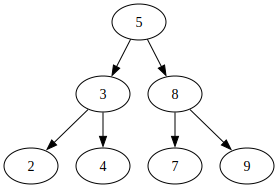

In [128]:
root = example_tree()
show_tree(root)

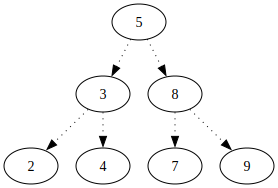

In [129]:
dot = graphviz.Digraph()
visual_preorder(root, dot)

## Postorder traversal

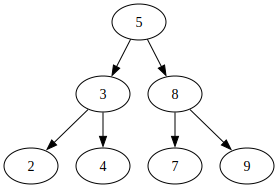

In [130]:
root = example_tree()
show_tree(root)

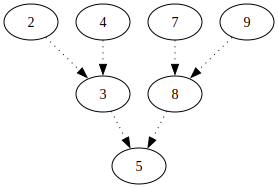

In [131]:
dot = graphviz.Digraph()
visual_postorder(root, dot)

## Exercise: Get the number of leaves

At the lectures, we made a function that counted the number of leaves in a tuple tree:

In [132]:
def count_leaves(root):
    if type(root) is not tuple:
        return 1
    return count_leaves(root[0]) + count_leaves(root[1])


tuple_tree = ((1, 2), (5, 7))

count_leaves(tuple_tree)

4

Make a corresponding function that counts leaves in a tree made from `TreeNode`s:

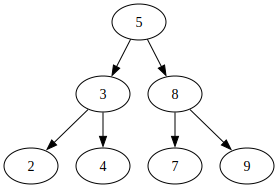

In [133]:
root = example_tree()
show_tree(root)

In [134]:
def count_leaves(root):
    if root.left == None and root.right == None:
        # base case: root is a leaf
        return 1
    else:
        # recursive case: root is an inner node
        return count_leaves(root.left) + count_leaves(root.right)

root = example_tree()
count_leaves(root)

4

## Exercise: Make each inner node the sum of its descendants

Write a recursive function that modifes the tree below so that each inner node becomes the sum of its descendants. This will make the root node 22 and its left and right children 6 and 16. 

What kind of traversal does your function use?

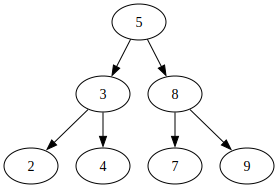

In [135]:
root = example_tree()
show_tree(root)

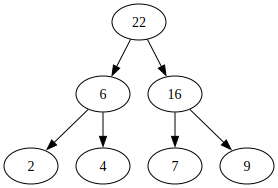

In [136]:
def descendant_sum(root):
    if root.left == None and root.right == None:
        # base case: root is a leaf and returns its key
        return root.key
    else:
        # recursive case: root is an inner node. set node's key to sum and return sum
        node_sum = descendant_sum(root.left) + descendant_sum(root.right)
        root.key = node_sum
        return node_sum
        

descendant_sum(root)    
show_tree(root)

## Exercise: Search an ordered tree

The way we insert nodes, any left child of a node is always smaller than its parent and a right child is always larger. 

When a tree obeys this rule, it serves as a data structure that makes it easier (often a lot) to find out if it holds a particular number. A search for a number, `x`, starts at the root. If `x` is the root key, the search ends successfully, returning `True`. If `x` is smaller, the search proceeds a the left child. Otherwise, it proceeds to the right child. If there are no children, the search ends unsuccesfully, returning `False`. In the example below, if `x = 5` then we would find it by visiting nodes 4, 6, and 5. If `x = 3`, we know it was not there after visiting nodes 4, 2, and 5.

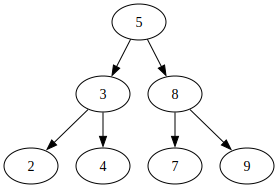

In [137]:
root = example_tree()
show_tree(root)

In [145]:
def tree_search(root, x):
    if root == None:
        # base case: next node doesn't exist. target value not in tree
        return False
    elif root.key == x:
        # base case: root's key is the target value
        return True
    
    elif x < root.key:
        # recursive case: target value is less than root's key, search left child
        return tree_search(root.left, x)
    else:
        # recursive case: target value is greater than root's key, search right child
        return tree_search(root.right, x)
    
        


tree_search(root, 1)

False

What is the big-O complexity of this search?

O(n), where n is the depth of the tree, because the algorithm performs operations for one node in each layer of the tree.

# Exercise: Tree search and tree ballance

Here is some code that times 1000 tree searches in trees with 1000 nodes:

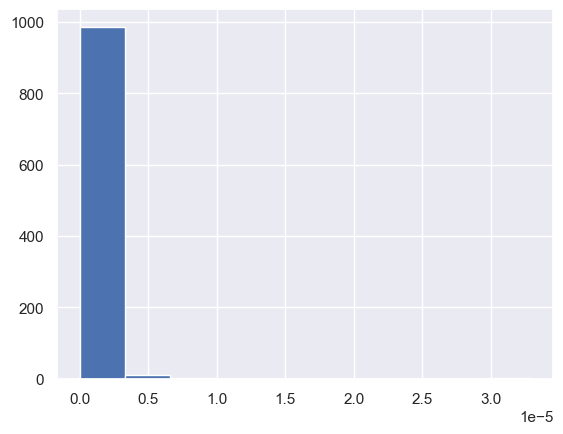

In [188]:
times = []
n = 1000
x = 9990
keys = list(range(1, n+1))
for _ in range(1000):

    random.shuffle(keys) # shuffle key order so trees are random
    
    root = build_tree(keys)
    
    begin = time.time()
        
    found_it = tree_search(root, x)

    elapsed = time.time() - begin
    times.append(elapsed)

plt.hist(times) ;

Same code as above but without shuffling the key order (be patient - it will take a couple of minutes to run):

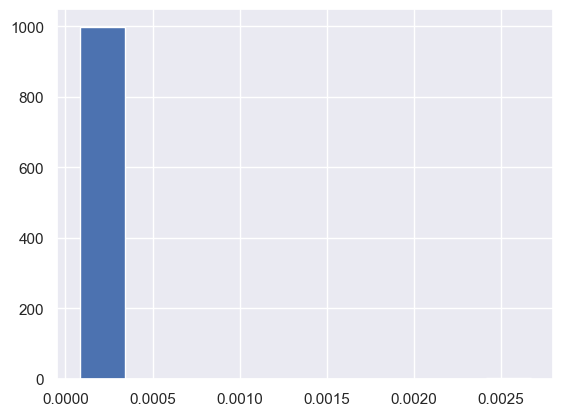

In [149]:
times = []
n = 1000
x = 9990
keys = list(range(1, n+1))
for _ in range(1000):

    root = build_tree(keys)
    
    begin = time.time()
        
    found_it = tree_search(root, x)

    elapsed = time.time() - begin
    times.append(elapsed)

plt.hist(times) ;

Same code as above but with with a magic key order. What do you think is special about it?

[7, 3, 1, 0, 2, 5, 4, 6, 11, 9, 8, 10, 13, 12, 14]


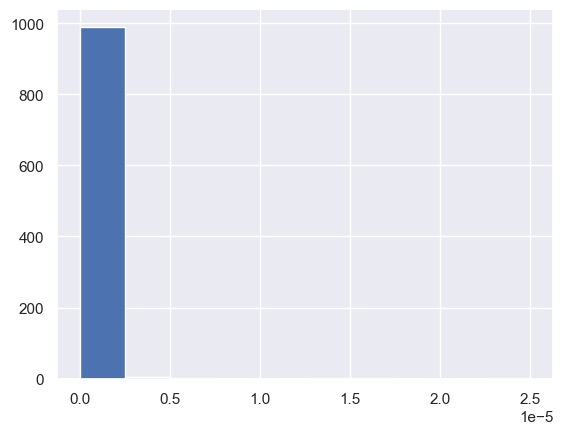

In [199]:
l = list(range(15))
magic_key_order = []
def magic(l):
    if not l: return
    i = len(l)//2
    magic_key_order.append(l[i])
    magic(l[:i])
    magic(l[i+1:])
magic(l)
print(magic_key_order)
times = []
n = 1000
x = 9990
keys = magic_key_order
for _ in range(1000):

    root = build_tree(keys)
    
    begin = time.time()
        
    found_it = tree_search(root, x)

    elapsed = time.time() - begin
    times.append(elapsed)

plt.hist(times) ;

Compare the running times of the three experiments. Why are they different?

Because the depths of the trees in the first case are random, always 1000 in the second case, and always minimised in the third case.

Keeping this difference in mind, how would you change the tree creation function to make sure that the starting tree is always balanced?

By using the the magic function on the keys before building the tree.

# Exercise: Deletion

Deletion is the process of removing a node from the binary tree. The deletion operation can be more complex than insertion, as it requires handling different cases, such as deleting a leaf node, deleting a node with one child, or deleting a node with two children. An example implementation of a deletion operation for a binary tree:

In [163]:
def get_min_value(root):
    while root.left is not None:
        root = root.left
    return root

def delete(root, key):
    if root is None:
        return root

    if key < root.key:
        root.left = delete(root.left, key)
    elif key > root.key:
        root.right = delete(root.right, key)
    else:
        if root.left is None:
            temp = root.right
            root = None
            return temp
        elif root.right is None:
            temp = root.left
            root = None
            return temp

        temp = get_min_value(root.right)
        root.key = temp.key
        root.right = delete(root.right, temp.key)
    return root


Here, `root` represents the root of the binary tree, and `key` represents the value of the node to be deleted. The deletion operation is also recursive. It handles different cases, such as deleting a node with no children (leaf node), deleting a node with one child (either left or right), or deleting a node with two children. The get_min_value function is used to find the minimum value node in the right subtree of a node with two children, which is used during deletion.

What is the big-O time-complexity of deleting a node?

The complexity is O(n), where n is the depth of the tree, because the algorithm performs operations for one node in each layer of the tree.

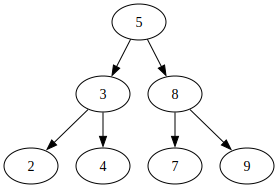

In [227]:
root = example_tree()
show_tree(root)

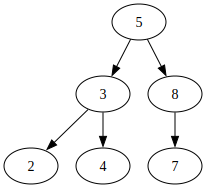

In [228]:
delete(root, 9)
show_tree(root)

Inserting or deleting leaves in a tree can make it unbalanced. How hard is it to make sure that the tree is always balanced after a deletion and what is the complexity?

You would need to turn the tree into a tuple, balance the tuple, then build the tree again.

The complexity would be O(n), where n is the amount of nodes in the tree after deletion.


---

> The visualization of traversals is from a Medium post by Vishal Sharma, Computer Science Research Scholar at IIT Guwahati, exploring machine learning and AI in mathematics, cosmology and history.
